In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import scipy.stats as stats
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

# Basic imports
import pandas as pd
import numpy as np
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

# Understanding the columns

player_name = Name of the player


rounds = Number of rounds completed

fairway_percentage = This statistic refers to the number of times during the round your drive landed in the fairway (the fairway, not the light rough). It is similar to the greens in regulation, except that the maximum number per round is less than 18. 

year = Year of competition.

avg_distance = The average driving distance is typically measured on two holes at each tournament and can result in nearly 40,000 shots being measured over the course of a season on some tours.

gir = Green in regulation (GIR) A green is considered hit "in regulation" if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par (i.e., by the first stroke on a par 3, the second stroke on a par 4, or the third stroke on a par 5).

average_putts = Average Putts is the average of putts by a player per round in the given year.

average_scrambling = Average Scrambling in golf is defined as: The percent of time a player misses the green in regulation, but still makes par or better on average based off their rounds.

average_score = Average Score is the average of all rounds played and scored by a player in a given year.

points = FedExCup Points are awarded by finish position as defined in the point distribution tables. Limited field events during the FedExCup competition will not redistribute the points for places that do not play.

wins = The amount of times a player as won in that given year.	

top_10 = Top 10 is the amount of times a player placed in the top 10 in an event of a given year.

average_sg_putts = Strokes Gained Putting reflects your performance on all putts. It compares the actual number of putts taken to the expected number of strokes to hole out based on the initial distance to the pin.

average_sg_total = Strokes gained: total simply compares a player's score to the field average. For example, a player will gain three strokes on the field if he shoots 69 on a day when the field averages 72.

sg:ott	Strokes Gained: Off the Tee does just what it says, tracking a player’s performance off the Tee. This stat only applies to Par 4s and 5s, which is something to keep in mind since a solid driver of the ball can still struggle with Par 3s even if their performance is off the charts in this category. 


sg:apr = Strokes Gained Approach reflects your performance on shots taken from more than 50 yards from the green, including layup shots. It takes into account the lie you were hitting from, as well as distance and accuracy.


sg:arg = Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.

In [2]:
df = pd.read_csv('../../../data/pgaTourData.csv')
df.head(10)

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
5,Brian Gay,103.0,71.37,2018,282.9,64.52,28.25,63.26,70.280,880,NaN,6.0,0.442,0.565,-0.166,0.036,0.253,"$2,152,501"
6,Kyle Stanley,93.0,71.29,2018,295.7,71.09,29.89,54.80,70.404,"1,198",NaN,5.0,0.037,0.686,0.378,0.298,-0.027,"$3,916,001"
7,Emiliano Grillo,94.0,70.16,2018,295.2,68.84,29.04,61.05,70.152,901,NaN,5.0,0.546,1.133,0.364,0.345,-0.122,"$2,493,163"
8,Russell Henley,77.0,70.03,2018,293.0,68.77,29.80,54.33,70.489,569,NaN,3.0,0.167,0.541,0.093,0.467,-0.186,"$1,516,438"
9,Jim Furyk,50.0,69.91,2018,280.5,63.19,28.73,62.58,70.342,291,NaN,2.0,0.389,0.412,-0.392,0.179,0.235,"$660,010"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [4]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

df.columns = map(str.lower, df.columns)
df["money"] = df["money"].str.replace("$", "")
df["money"] = df["money"].str.replace(",", "")
df["money"] = df["money"].str.replace(".", "")
df["money"] = df["money"].astype('float64')

df.columns=df.columns.str.replace(' ', '_')
df

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0


In [5]:
df.to_csv(path_or_buf='../../../data/pgaTourData_clean.csv', index = False)

In [6]:
df['money'].describe()

count    1.674000e+03
mean     1.488682e+06
std      1.410333e+06
min      2.465000e+04
25%      5.656412e+05
50%      1.046144e+06
75%      1.892478e+06
max      1.203046e+07
Name: money, dtype: float64

In [7]:
df['money']=df['money'].apply(lambda x: 1 if x> 1.046144e+06 else 0)
df['money'].value_counts()

1    837
0    837
Name: money, dtype: int64

In [8]:
players_that_won = df.loc[df['wins'] >= 1, :]
players_that_won.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,1
16,Billy Horschel,86,67.80,2018,295.4,71.75,29.46,58.03,70.154,960,1,3,0.392,1.112,0.538,0.352,-0.169,1
22,"Ted Potter, Jr.",87,66.83,2018,286.0,63.03,28.45,57.51,71.024,744,1,1,0.074,-0.094,-0.074,-0.200,0.105,1
23,Austin Cook,107,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060,1,3,0.315,0.569,0.120,-0.045,0.179,1
27,Ian Poulter,73,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030,1,4,0.223,0.850,0.141,0.435,0.051,1


In [9]:
players_that_have_top10 = df.loc[df['top_10'] >= 1, :]
players_that_have_top10.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,1
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,1
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1


In [10]:
df.corr()['wins']

rounds                0.103162
fairway_percentage   -0.047949
year                  0.039006
avg_distance          0.206294
gir                   0.120340
average_putts        -0.168764
average_scrambling    0.125193
average_score        -0.390254
points                0.750110
wins                  1.000000
top_10                0.473453
average_sg_putts      0.149155
average_sg_total      0.384932
sg:ott                0.232414
sg:apr                0.259363
sg:arg                0.134948
money                 0.386336
Name: wins, dtype: float64

# Feature engeneering

In [11]:
df['distance_per_fairway'] = df['avg_distance'] / df['fairway_percentage']

In [12]:
df['winners']=df['wins'].apply(lambda x: 1 if x>0 else 0)
df.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_per_fairway,winners
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,1,3.876845,0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,1,3.852949,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,1,3.965947,0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1,4.020017,0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1,3.903975,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           1674 non-null   object 
 1   rounds                1674 non-null   int64  
 2   fairway_percentage    1674 non-null   float64
 3   year                  1674 non-null   int64  
 4   avg_distance          1674 non-null   float64
 5   gir                   1674 non-null   float64
 6   average_putts         1674 non-null   float64
 7   average_scrambling    1674 non-null   float64
 8   average_score         1674 non-null   float64
 9   points                1674 non-null   int64  
 10  wins                  1674 non-null   int64  
 11  top_10                1674 non-null   int64  
 12  average_sg_putts      1674 non-null   float64
 13  average_sg_total      1674 non-null   float64
 14  sg:ott                1674 non-null   float64
 15  sg:apr               

In [14]:
df.isna().sum()

player_name             0
rounds                  0
fairway_percentage      0
year                    0
avg_distance            0
gir                     0
average_putts           0
average_scrambling      0
average_score           0
points                  0
wins                    0
top_10                  0
average_sg_putts        0
average_sg_total        0
sg:ott                  0
sg:apr                  0
sg:arg                  0
money                   0
distance_per_fairway    0
winners                 0
dtype: int64

#  Model Function

In [15]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print scores
    print('Training accuracy score: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy score: ', accuracy_score(y_val, val_preds))
    print('Training Precision score: ', precision_score(y_train, train_preds))
    print('Validation Precision score: ', precision_score(y_val, val_preds))
    print('Training recall score: ', recall_score(y_train, train_preds))
    print('Validation recall score: ', recall_score(y_val, val_preds))
    print("Training RMSE: ", (np.sqrt(mean_squared_error(y_train, train_preds))))
    print("Validation RMSE: ", (np.sqrt(mean_squared_error(y_val, val_preds))))
    print("Training r2 score: ", r2_score(y_train, train_preds))
    print("Validation r2 score: ", r2_score(y_val, val_preds))
    # return fitted model
    return model

In [16]:
# Target
y = df['money']
# Features
X = df.drop(df[['money','player_name','wins','avg_distance','fairway_percentage']], axis=1)

In [17]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.35, random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.35, random_state=42,shuffle=True)

In [18]:
# Instantiate a SimpleImputer
imputer = SimpleImputer(strategy='median')
# Fit on training data
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [19]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X.columns)
print("X_train missing: ", X_train_imputed.isna().sum().sum())
print('X_val missing: ', X_val_imputed.isna().sum().sum())

X_train missing:  0
X_val missing:  0


In [20]:
num_cols = list(X.select_dtypes('number').columns)

In [21]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [22]:
# fit on Imputed training data
scaler.fit(X_train_imputed[num_cols])

StandardScaler()

In [23]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed[num_cols]), columns=num_cols)

In [24]:
# Instantiate LogisticRegression
logreg2 = LogisticRegression()

In [25]:
logreg2.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
# call modeling function
logreg2 = modeling_function(logreg2, X_train_scaled, y_train, X_val_scaled , y_val)

Training accuracy score:  0.925035360678925
Validation accuracy score:  0.9553805774278216
Training Precision score:  0.9259259259259259
Validation Precision score:  0.9615384615384616
Training recall score:  0.9232954545454546
Validation recall score:  0.9459459459459459
Training RMSE:  0.2737967116695797
Validation RMSE:  0.21123310008655954
Training r2 score:  0.7001360435339309
Validation r2 score:  0.8213734142305571


In [27]:
y_train.value_counts()

0    355
1    352
Name: money, dtype: int64

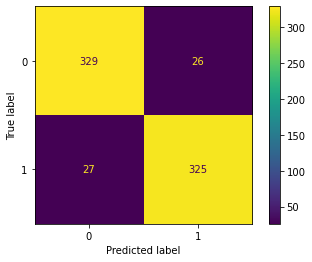

In [28]:
plot_confusion_matrix(logreg2, X_train_scaled, y_train)

In [29]:
dt2 = DecisionTreeClassifier(random_state=42, max_depth=10)

In [30]:
dt2 = modeling_function(dt2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  1.0
Validation accuracy score:  0.9028871391076115
Training Precision score:  1.0
Validation Precision score:  0.8854166666666666
Training recall score:  1.0
Validation recall score:  0.918918918918919
Training RMSE:  0.0
Validation RMSE:  0.31162936461827284
Training r2 score:  1.0
Validation r2 score:  0.6112244897959185


In [31]:
rf = RandomForestClassifier(random_state=42, )

In [32]:

rf = modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  1.0
Validation accuracy score:  0.94750656167979
Training Precision score:  1.0
Validation Precision score:  0.9508196721311475
Training recall score:  1.0
Validation recall score:  0.9405405405405406
Training RMSE:  0.0
Validation RMSE:  0.22911446554115691
Training r2 score:  1.0
Validation r2 score:  0.7898510755653614


In [33]:
# Create Param Grid 
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [34]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [35]:
rf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [36]:
best_model = rf_gs.best_estimator_

In [37]:
rf_gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 7, 'n_estimators': 75}

In [38]:
modeling_function(best_model, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  0.9476661951909476
Validation accuracy score:  0.9501312335958005
Training Precision score:  0.9461756373937678
Validation Precision score:  0.9560439560439561
Training recall score:  0.9488636363636364
Validation recall score:  0.9405405405405406
Training RMSE:  0.22876582963601083
Validation RMSE:  0.22331315770504764
Training r2 score:  0.7906610115236876
Validation r2 score:  0.8003585217870932


RandomForestClassifier(max_depth=10, min_samples_leaf=7, n_estimators=75,
                       random_state=42)

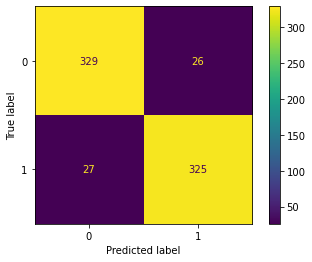

In [39]:
plot_confusion_matrix(logreg2, X_train_scaled, y_train)

In [40]:
xgb = XGBClassifier(random_state=42)

In [41]:
xgb = modeling_function(xgb, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  1.0
Validation accuracy score:  0.94750656167979
Training Precision score:  1.0
Validation Precision score:  0.9558011049723757
Training recall score:  1.0
Validation recall score:  0.9351351351351351
Training RMSE:  0.0
Validation RMSE:  0.22911446554115691
Training r2 score:  1.0
Validation r2 score:  0.7898510755653614


In [42]:
param_grid = {'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [43]:
xgb_gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy')

In [44]:
xgb_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                           

In [45]:
best_model = xgb_gs.best_estimator_

In [46]:
xgb_gs.best_params_

{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'subsample': 1.0}

In [47]:
modeling_function(best_model, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  0.9561527581329562
Validation accuracy score:  0.9553805774278216
Training Precision score:  0.9652173913043478
Validation Precision score:  0.9719101123595506
Training recall score:  0.9460227272727273
Validation recall score:  0.9351351351351351
Training RMSE:  0.209397330133514
Validation RMSE:  0.21123310008655954
Training r2 score:  0.8246078745198464
Validation r2 score:  0.8213734142305571


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

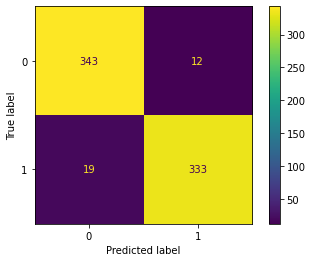

In [48]:
plot_confusion_matrix(best_model, X_train_scaled, y_train)

In [49]:
#poly = PolynomialFeatures()

#poly_train = poly.fit_transform(X_train_scaled)

#polymodel = LinearRegression()

#modeling_function(polymodel, X_train_scaled, y_train, X_val_scaled, y_val)

In [50]:
y_val.value_counts()

0    196
1    185
Name: money, dtype: int64